## Import libraries

In [700]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm, skew, probplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold, cross_val_score,cross_val_predict,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,StackingRegressor,VotingRegressor
from sklearn.metrics import explained_variance_score,r2_score,mean_absolute_error,mean_squared_error


## Load Data

In [463]:
df_train = pd.read_csv('train_selected.csv')
df_train.head()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,1,1400.60,554.36,47.47,521.66,191,0
1,1,2,1403.14,553.75,47.49,522.28,190,0
2,1,3,1404.20,554.26,47.27,522.42,189,0
3,1,4,1401.87,554.45,47.13,522.86,188,0
4,1,5,1406.22,554.00,47.28,522.19,187,0


In [464]:
#df_test = pd.read_csv('test_selected.csv')
df_test = pd.read_csv('test_selected_ttf.csv')
df_test.head()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,31,1398.91,554.42,47.23,521.79,112,0
1,2,49,1410.83,553.52,47.67,521.74,98,0
2,3,126,1418.89,552.59,47.88,520.83,69,0
3,4,106,1406.88,552.64,47.65,521.88,82,0
4,5,98,1419.36,553.29,47.46,521.00,91,0


## Exploratory Data Analysis (EDA)

### Data Information

In [376]:
df_train.shape

(20631, 8)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   s1         20631 non-null  float64
 3   s2         20631 non-null  float64
 4   s3         20631 non-null  float64
 5   s4         20631 non-null  float64
 6   ttf        20631 non-null  int64  
 7   label_bnc  20631 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 1.3 MB


In [296]:
df_train.describe()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,1408.933782,553.367711,47.541168,521.413470,107.807862,0.150259
std,29.227633,68.880990,9.000605,0.885092,0.267087,0.737553,68.880990,0.357334
min,1.000000,1.000000,1382.250000,549.850000,46.850000,518.690000,0.000000,0.000000
25%,26.000000,52.000000,1402.360000,552.810000,47.350000,520.960000,51.000000,0.000000
50%,52.000000,104.000000,1408.040000,553.440000,47.510000,521.480000,103.000000,0.000000
75%,77.000000,156.000000,1414.555000,554.010000,47.700000,521.950000,155.000000,0.000000
max,100.000000,362.000000,1441.490000,556.060000,48.530000,523.380000,361.000000,1.000000


### The relation between target column and some other columns

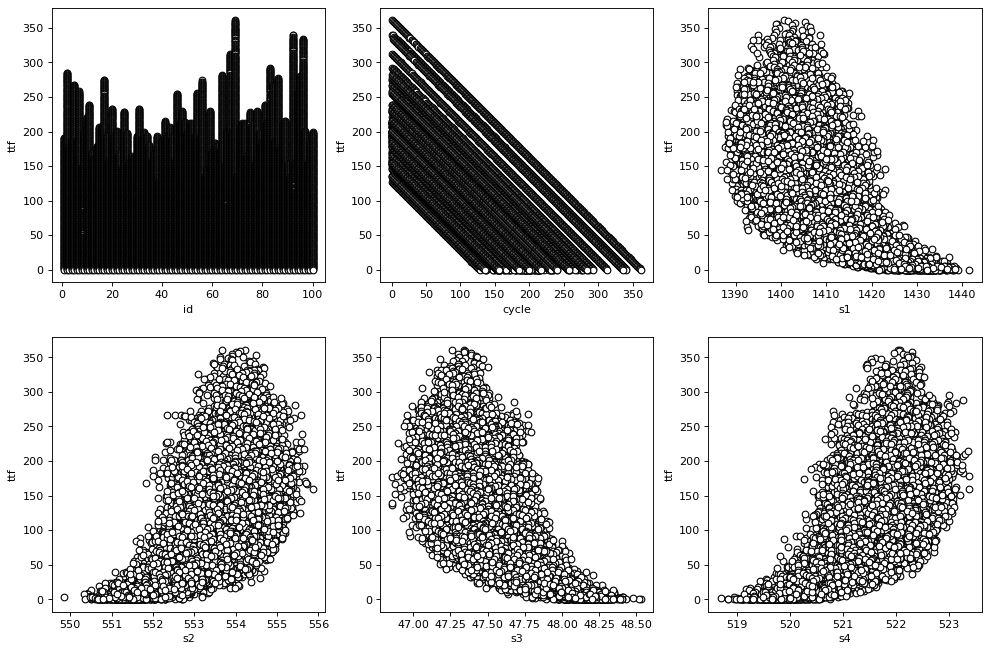

In [345]:
figure(figsize=(15, 10), dpi=80)

plt.subplot(2, 3, 1)
plt.scatter(x = df_train['id'], y = df_train['ttf'], color = "w", edgecolor = 'k')
plt.xlabel('id')
plt.ylabel('ttf')

plt.subplot(2, 3, 2)
plt.scatter(x = df_train['cycle'], y = df_train['ttf'], color = "w", edgecolor = 'k')
plt.xlabel('cycle')
plt.ylabel('ttf')

plt.subplot(2, 3, 3)
plt.scatter(x = df_train['s1'], y = df_train['ttf'], color = "w", edgecolor = 'k')
plt.xlabel('s1')
plt.ylabel('ttf')

plt.subplot(2, 3, 4)
plt.scatter(x = df_train['s2'], y = df_train['ttf'], color = "w", edgecolor = 'k')
plt.xlabel('s2')
plt.ylabel('ttf')

plt.subplot(2, 3, 5)
plt.scatter(x = df_train['s3'], y = df_train['ttf'], color = "w", edgecolor = 'k')
plt.xlabel('s3')
plt.ylabel('ttf')

plt.subplot(2, 3, 6)
plt.scatter(x = df_train['s4'], y = df_train['ttf'], color = "w", edgecolor = 'k')
plt.xlabel('s4')
plt.ylabel('ttf')
plt.show()

/Users/mty/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ttf', ylabel='Density'>

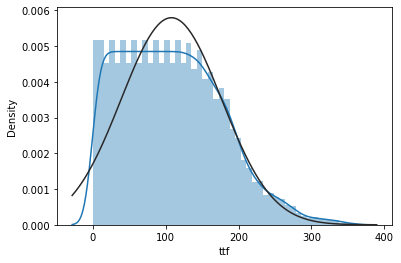

In [7]:
sns.distplot(df_train.ttf, fit=norm)

In [8]:
df_train.ttf.skew()

0.49990396528215497

In [9]:
df_train.ttf.kurt()

-0.2185391030505719

### Correlation Between Independent Variables

In [12]:
cor_matrix = df_train.copy().drop(['label_bnc'], axis=1).corr()
cor_matrix.style.background_gradient(cmap='coolwarm')

,id,cycle,s1,s2,s3,s4,ttf
id,1.000000,0.078753,0.026116,-0.032073,0.024707,-0.031882,0.078753
cycle,0.078753,1.000000,0.624577,-0.595914,0.634385,-0.611354,-0.736241
s1,0.026116,0.624577,1.000000,-0.793130,0.830136,-0.815591,-0.678948
s2,-0.032073,-0.595914,-0.793130,1.000000,-0.822805,0.812713,0.657223
s3,0.024707,0.634385,0.830136,-0.822805,1.000000,-0.846884,-0.696228
s4,-0.031882,-0.611354,-0.815591,0.812713,-0.846884,1.000000,0.671983
ttf,0.078753,-0.736241,-0.678948,0.657223,-0.696228,0.671983,1.000000


In [13]:
cor_matrix2 = cor_matrix["ttf"]
cor_matrix2 = cor_matrix2.to_frame()
cor_matrix2.style.background_gradient(cmap='coolwarm')

,ttf
id,0.078753
cycle,-0.736241
s1,-0.678948
s2,0.657223
s3,-0.696228
s4,0.671983
ttf,1.000000


### Detect Outliers

In [ ]:
'''
index_list = []
for index, row in df_train.iterrows():
    if (row['s1']< 1386 and row['ttf']< 202) :
        print("1", index)
        index_list.append(index)
    if (row['s1']< 1388 and row['ttf']< 250 and row['ttf']>216) :
        print("2", index)
        index_list.append(index)
    if (row['s1']< 1389 and row['ttf']<125  and row['ttf']>75) :
        print("3", index)   
        index_list.append(index)
    if (row['s1']< 1390 and row['ttf']<300  and row['ttf']>248) :
        print("4", index)   
        index_list.append(index)
    if (row['s1']> 1408 and  row['ttf']>350) :
        print("5", index)   
        index_list.append(index)
    if (row['s1']> 1410 and  row['ttf']>330) :
        print("6", index)   
        index_list.append(index)
    if (row['s1']> 1412 and  row['ttf']>280) :
        print("7", index)   
        index_list.append(index) 
    if (row['s1']> 1415 and  row['ttf']>260) :
        print("8", index)   
        index_list.append(index)    
    if (row['s1']> 1418 and  row['ttf']>248) :
        print("9", index)   
        index_list.append(index)   
    if (row['s1']> 1420 and  row['ttf']>200) :
        print("10", index)   
        index_list.append(index)  
    if (row['s1']> 1424 and row['ttf']<99  and row['ttf']>87) :
        print("11", index)   
        index_list.append(index)
    if (row['s2']> 555 and row['ttf']<48 ) :
        print("12", index)   
        index_list.append(index)
    if (row['s2']> 555.2 and row['ttf']<100 ) :
        print("13", index)   
        index_list.append(index)
    if (row['s2']> 556  ) :
        print("14", index)   
        index_list.append(index)
    if (row['s2']> 554.8 and row['ttf']>310 ) :
        print("15", index)   
        index_list.append(index)
    if (row['s2']> 555 and row['ttf']>302 ) :
        print("16", index)   
        index_list.append(index)
    if (row['s3']< 47.125 and row['ttf']<55 ) :
        print("17", index)   
        index_list.append(index)
    if (row['s3']< 46.99 and row['ttf']>270 ) :
        print("18", index)   
        index_list.append(index)
    if (row['s3']< 47.05 and row['ttf']>310 ) :
        print("19", index)   
        index_list.append(index)
    if (row['s3']> 47.6 and row['ttf']>320 ) :
        print("20", index)   
        index_list.append(index)
    if (row['s4']> 522.8 and row['ttf']<50 ) :
        print("21", index)   
        index_list.append(index)
    if (row['s4']< 520.2 and row['ttf']>200 ) :
        print("22", index)   
        index_list.append(index)
    if (row['s4']< 521 and row['ttf']>300 ) :
        print("23", index)   
        index_list.append(index)
    if (row['s4']> 523.1 and row['ttf']<125 ) :
        print("24", index)   
        index_list.append(index)
    if (row['s4']> 522.5 and row['ttf']>325 ) :
        print("25", index)   
        index_list.append(index)
'''

### Drop Outliers

In [ ]:
'''
df_train.drop(df_train.index[index_list],inplace=True)
df_train
'''

## Feature Engineering

### choose features

In [723]:
X = df_train.iloc[:,:-2]
del X['id']
X.head()

,cycle,s1,s2,s3,s4
0,1,1400.60,554.36,47.47,521.66
1,2,1403.14,553.75,47.49,522.28
2,3,1404.20,554.26,47.27,522.42
3,4,1401.87,554.45,47.13,522.86
4,5,1406.22,554.00,47.28,522.19


In [724]:
y = df_train.iloc[:,-2]
y.head()

0    191
1    190
2    189
3    188
4    187
Name: ttf, dtype: int64

In [725]:
truth_X = df_test.iloc[:,:-2]
del truth_X["id"]
truth_X.head()

,cycle,s1,s2,s3,s4
0,31,1398.91,554.42,47.23,521.79
1,49,1410.83,553.52,47.67,521.74
2,126,1418.89,552.59,47.88,520.83
3,106,1406.88,552.64,47.65,521.88
4,98,1419.36,553.29,47.46,521.00


In [726]:
truth_y = df_test.iloc[:,-2]
truth_y.head()

0    112
1     98
2     69
3     82
4     91
Name: ttf, dtype: int64

### Normalization

In [727]:
all_data = pd.concat([X,truth_X])
scaler = StandardScaler()
normed = scaler.fit_transform(all_data.copy())
X = pd.DataFrame(data=normed, columns=X.columns)
X

,cycle,s1,s2,s3,s4
0,-1.567848,-0.926932,1.122224,-0.267468,0.335219
1,-1.553319,-0.644682,0.433081,-0.192577,1.176020
2,-1.538791,-0.526893,1.009250,-1.016382,1.365878
3,-1.524262,-0.785807,1.223901,-1.540622,1.962575
4,-1.509733,-0.302426,0.715517,-0.978937,1.053968
...,...,...,...,...,...
20726,-0.173104,-1.222517,0.704219,-1.503176,1.203143
20727,0.364454,0.219847,0.772004,-0.604480,0.226729
20728,0.175582,0.725453,0.082860,0.444000,0.158923
20729,-0.173104,-1.218072,1.562824,-1.053828,0.552200


In [728]:
truth_X = X.tail(100)
truth_X

,cycle,s1,s2,s3,s4
20631,-1.131990,-1.114728,1.190009,-1.166165,0.511516
20632,-0.870476,0.209846,0.173240,0.481446,0.443710
20633,0.248225,1.105490,-0.877422,1.267806,-0.790368
20634,-0.042347,-0.229086,-0.820935,0.406554,0.633568
20635,-0.158575,1.157717,-0.086601,-0.304914,-0.559826
...,...,...,...,...,...
20726,-0.173104,-1.222517,0.704219,-1.503176,1.203143
20727,0.364454,0.219847,0.772004,-0.604480,0.226729
20728,0.175582,0.725453,0.082860,0.444000,0.158923
20729,-0.173104,-1.218072,1.562824,-1.053828,0.552200


In [729]:
X = X.iloc[:-100]
X

,cycle,s1,s2,s3,s4
0,-1.567848,-0.926932,1.122224,-0.267468,0.335219
1,-1.553319,-0.644682,0.433081,-0.192577,1.176020
2,-1.538791,-0.526893,1.009250,-1.016382,1.365878
3,-1.524262,-0.785807,1.223901,-1.540622,1.962575
4,-1.509733,-0.302426,0.715517,-0.978937,1.053968
...,...,...,...,...,...
20626,1.265226,2.187818,-2.187925,1.979274,-2.607583
20627,1.279754,2.737873,-2.831878,1.866937,-2.349918
20628,1.294283,2.137814,-2.741499,2.054165,-1.902395
20629,1.308811,1.954462,-3.035232,3.177536,-2.363479


### PolynomialFeatures

In [706]:
poly = PolynomialFeatures(degree=2)
poly_X =poly.fit_transform(X)

feature_names = poly.get_feature_names(X.columns)
poly_X = pd.DataFrame(poly_X)
poly_X.columns = feature_names
X = poly_X
X.head()

,1,cycle,s1,s2,s3,s4,cycle^2,cycle s1,cycle s2,cycle s3,...,s1^2,s1 s2,s1 s3,s1 s4,s2^2,s2 s3,s2 s4,s3^2,s3 s4,s4^2
0,1.0,-1.567848,-0.926932,1.122224,-0.267468,0.335219,2.458147,1.453288,-1.759477,0.419350,...,0.859203,-1.040226,0.247925,-0.310726,1.259388,-0.300159,0.376191,0.071539,-0.089661,0.112372
1,1.0,-1.553319,-0.644682,0.433081,-0.192577,1.176020,2.412800,1.001397,-0.672713,0.299133,...,0.415615,-0.279199,0.124151,-0.758159,0.187559,-0.083401,0.509312,0.037086,-0.226474,1.383023
2,1.0,-1.538791,-0.526893,1.009250,-1.016382,1.365878,2.367876,0.810778,-1.553024,1.564000,...,0.277616,-0.531767,0.535525,-0.719671,1.018586,-1.025784,1.378513,1.033033,-1.388254,1.865623
3,1.0,-1.524262,-0.785807,1.223901,-1.540622,1.962575,2.323375,1.197776,-1.865546,2.348312,...,0.617493,-0.961750,1.210632,-1.542206,1.497934,-1.885570,2.401999,2.373517,-3.023587,3.851702
4,1.0,-1.509733,-0.302426,0.715517,-0.978937,1.053968,2.279295,0.456583,-1.080239,1.477933,...,0.091462,-0.216391,0.296056,-0.318748,0.511964,-0.700445,0.754132,0.958317,-1.031768,1.110849


### PCA

In [707]:
pca = PCA(n_components=21)
principalComponents = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.6209441 , 0.1160739 , 0.08557313, 0.04215559, 0.0376148 ,
       0.03167856, 0.01744524, 0.01001258, 0.00743351, 0.0065422 ,
       0.00540584, 0.00393844, 0.00350493, 0.00280888, 0.00221837,
       0.00178037, 0.00150616, 0.00122321, 0.00112719, 0.00101301,
       0.        ])

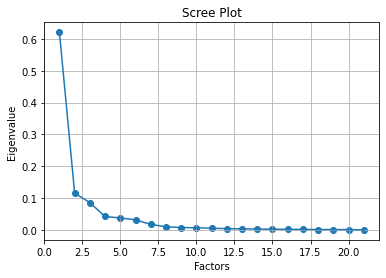

In [708]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,22),importance)
plt.plot(range(1,22),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [709]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8'])
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,-1.051381,0.780793,2.383386,-0.379136,1.361606,-0.526145,-1.105462,0.477903
1,-1.271082,0.654785,2.265181,-0.052788,-0.819295,-1.205402,-1.086936,0.496019
2,0.596944,1.844063,2.567336,-1.097012,-1.237527,-0.199452,-0.871161,0.027063
3,3.528330,3.477890,2.584364,-1.330063,-2.831554,-0.102144,-0.549981,-0.200606
4,-0.639003,1.119165,2.324118,-0.742564,-1.065210,0.306235,-0.946770,0.232733


In [710]:
truth_X = principalDf.tail(100)
truth_X.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
20631,0.208040,2.003942,1.470946,0.063238,1.133430,0.862209,-0.472550,-0.172089
20632,-2.996797,-0.489626,-0.063274,-0.101233,-0.121575,-0.079493,-0.722562,0.239646
20633,0.411337,-1.346061,-1.881192,0.544427,0.154271,0.768582,-0.360846,-0.034495
20634,-2.870150,-0.671389,-0.681137,-0.237602,0.106708,0.051741,-0.180201,-0.334345
20635,-2.446047,-0.981290,-1.004805,0.733275,0.231908,-0.581958,-0.392599,-0.224964


In [711]:
X = principalDf.iloc[:-100]
X.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,-1.051381,0.780793,2.383386,-0.379136,1.361606,-0.526145,-1.105462,0.477903
1,-1.271082,0.654785,2.265181,-0.052788,-0.819295,-1.205402,-1.086936,0.496019
2,0.596944,1.844063,2.567336,-1.097012,-1.237527,-0.199452,-0.871161,0.027063
3,3.528330,3.477890,2.584364,-1.330063,-2.831554,-0.102144,-0.549981,-0.200606
4,-0.639003,1.119165,2.324118,-0.742564,-1.065210,0.306235,-0.946770,0.232733


## Modeling Without Cross-Validation

### Splitting Data Into Train and Test

In [608]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.head()

,cycle,s1,s2,s3,s4
14054,-0.681604,0.723230,0.037670,-0.267468,0.226729
19733,1.061825,0.044274,-0.165683,-0.230023,0.158923
8586,0.480682,0.036496,-0.120494,0.706120,-0.261478
2582,-1.044819,0.388753,0.241024,-0.230023,0.606445
13054,0.422568,0.017605,-0.346442,0.781011,-0.505581


### Constructor Of Models

In [712]:
regressors = [
            ('LinearReg', LinearRegression()),
            ('Ridge', Ridge()),
            ('Lasso', Lasso()),
            ('BayesianRidge', BayesianRidge()),
            ('RF', RandomForestRegressor()),
            ('GradientBoost', GradientBoostingRegressor()),
            ]

### Train Models And Test Models On The Split Training Set

In [610]:
scores = []

for  name, regressor in regressors:
    # Train models
    regressor.fit(X_train, y_train)  
    # Predict target value     
    y_pred = regressor.predict(X_test) 
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    evs = explained_variance_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    scores.append([name,mse,mae,r2,evs])
    
scores = pd.DataFrame(scores) 
scores.columns = ['Model', 'mean_squared_error','mean_absolute_error','r2_score','explained_variance_score']
scores = scores.sort_values(by='mean_squared_error',ascending=True)
scores

,Model,mean_squared_error,mean_absolute_error,r2_score,explained_variance_score
5,GradientBoost,1383.182499,26.462078,0.713023,0.713109
4,RF,1474.864749,27.557507,0.694001,0.694151
0,LinearReg,1644.603739,30.924049,0.658785,0.658822
1,Ridge,1644.605095,30.923998,0.658784,0.658822
3,BayesianRidge,1644.613302,30.923697,0.658783,0.658820
2,Lasso,1648.389034,30.942734,0.657999,0.658038


### Visualisation On The Split Training Set

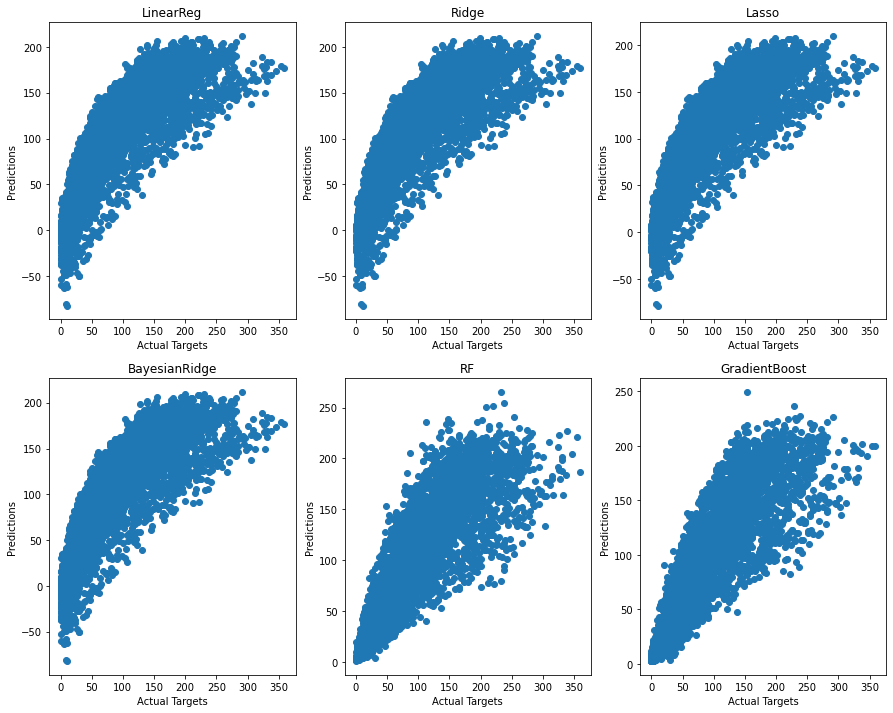

In [611]:
#Prediction-Actual target graphs
f, ax = plt.subplots(2, 3, figsize=(15, 12))
for i, regressor in enumerate(regressors):
    y_pred = regressor[1].predict(X_test)
    plt.subplot(2, 3, i+1)
    plt.scatter(x=y_test,y=y_pred) 
    plt.title(regressor[0])
    plt.xlabel('Actual Targets',size=10)
    plt.ylabel('Predictions',size=10) 
plt.show()

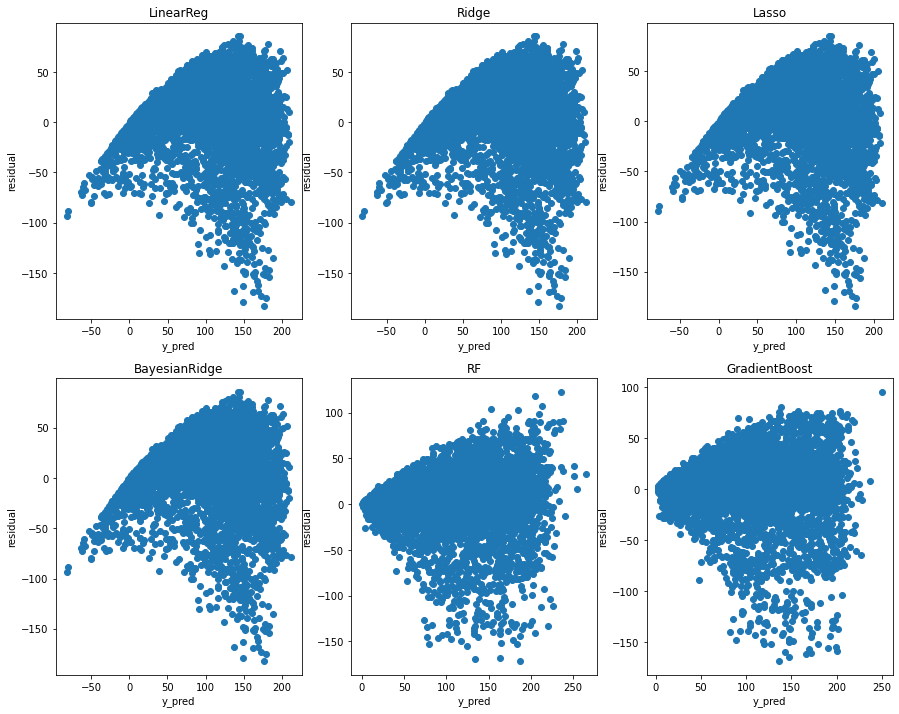

In [612]:
#residual-prediction graphs
f, ax = plt.subplots(2, 3, figsize=(15, 12))
for i, regressor in enumerate(regressors):
    y_pred = regressor[1].predict(X_test)
    plt.subplot(2, 3, i+1)
    plt.scatter(x=y_pred,y=y_pred-y_test)
    plt.title(regressor[0])
    plt.xlabel('y_pred',size=10)
    plt.ylabel('residual',size=10)
plt.show()


## Evaluation with Cross Validation (K-Fold)

In [639]:
cv = KFold(n_splits = 5, shuffle = True)
scores = []
for  name, regressor in regressors:
    mse = cross_val_score(regressor, X, y, cv= cv, scoring="neg_mean_squared_error")
    scores.append([name,-mse.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['Model', 'mean_squared_error']
scores = scores.sort_values(by='mean_squared_error',ascending=True)
scores 

,Model,mean_squared_error
5,GradientBoost,1442.305566
4,RF,1506.144357
0,LinearReg,2879.457875
3,BayesianRidge,2879.772066
1,Ridge,2880.783794
2,Lasso,2881.099980


### Model Tuning using KFold

random forest

In [731]:
estimators = [50, 100, 150, 200, 250, 300, 350]
scores = []
for count in estimators:
    score = cross_val_score(RandomForestRegressor(n_estimators= count), X, y, cv= cv, scoring="neg_mean_squared_error")
    scores.append([count,-score.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['n_estimators', 'mean_squared_error']
scores = scores.sort_values(by='mean_squared_error',ascending=True)
scores 

,n_estimators,mean_squared_error
4,250,1499.019762
6,350,1506.516245
5,300,1508.614761
2,150,1515.230050
3,200,1516.804976
1,100,1524.525411
0,50,1534.095799


ridge

In [722]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
scores = []
for a in alphas:
    score = cross_val_score(Ridge(alpha= a), X, y, cv= cv, scoring="neg_mean_squared_error")
    scores.append([a,-score.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['alpha', 'mean_squared_error']
scores = scores.sort_values(by='mean_squared_error',ascending=True)
scores

,alpha,mean_squared_error
0,1.000000e-15,1429.811697
3,1.000000e-04,1429.819532
8,1.000000e+01,1429.823914
2,1.000000e-08,1429.894970
5,1.000000e-02,1429.914946
1,1.000000e-10,1429.947160
7,5.000000e+00,1429.974890
9,2.000000e+01,1430.086496
4,1.000000e-03,1430.089634
6,1.000000e+00,1430.327640


Lasso

In [671]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
scores = []
for a in alphas:
    score = cross_val_score(Lasso(alpha= a), X, y, cv= cv, scoring="neg_mean_squared_error")
    scores.append([a,-score.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['alpha', 'mean_squared_error']
scores = scores.sort_values(by='mean_squared_error',ascending=True)
scores

/Users/mty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10549804.053605266, tolerance: 7782.368147552109
  model = cd_fast.enet_coordinate_descent(
/Users/mty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10038419.247909712, tolerance: 7824.691630996669
  model = cd_fast.enet_coordinate_descent(
/Users/mty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7570051.620870636, tolerance: 7845.214935571039
  model = cd_fast.enet_coordinate_descent(
/Users/mty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

,alpha,mean_squared_error
2,1.000000e-08,1429.829146
1,1.000000e-10,1429.963444
5,1.000000e-02,1430.086360
4,1.000000e-03,1430.099278
0,1.000000e-15,1430.148492
3,1.000000e-04,1430.210737
6,1.000000e+00,1436.860084
7,5.000000e+00,1591.869076
8,1.000000e+01,1895.011177
9,2.000000e+01,2193.301054


BayesianRidge

In [690]:
n_iters = [200,250,300,350,400,450]
scores = []
for i in n_iters:
    score = cross_val_score(BayesianRidge(n_iter= i), X, y, cv= cv, scoring="neg_mean_squared_error")
    scores.append([i,-score.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['iterations', 'mean_squared_error']
scores = scores.sort_values(by='mean_squared_error',ascending=True)
scores


,iterations,mean_squared_error
2,300,1429.828441
0,200,1429.891657
3,350,1430.066155
1,250,1430.099684
4,400,1430.188488
5,450,1430.247981


GradientBoosting

In [735]:
n_estimators_list = [100,500,1000,1500,2000,4000,8000]
scores = []
for i in n_estimators_list:
    score = cross_val_score(GradientBoostingRegressor(n_estimators= i), X, y, cv= cv, scoring="neg_mean_squared_error")
    scores.append([i,-score.mean()])
    
scores = pd.DataFrame(scores) 
scores.columns = ['n_estimators', 'mean_squared_error']
scores = scores.sort_values(by='mean_squared_error',ascending=True)
scores

,n_estimators,mean_squared_error
0,100,1422.098862
1,500,1444.838342
2,1000,1493.429186
3,1500,1510.518684
4,2000,1544.304892
5,4000,1642.616401
6,8000,1767.933447


## Final Model And Prediction Visualisation

### Final model

In [739]:
gbr = GradientBoostingRegressor(n_estimators= 100)
gbr.fit(X,y)
scores = []
y_pred = gbr.predict(truth_X) 
mse = mean_squared_error(truth_y,y_pred)
r2 = r2_score(truth_y,y_pred)
evs = explained_variance_score(truth_y,y_pred)
mae = mean_absolute_error(truth_y,y_pred)
scores.append(["GradientBoosting",mse,mae,r2,evs])
scores = pd.DataFrame(scores) 
scores.columns = ['Model', 'mean_squared_error','mean_absolute_error','r2_score','explained_variance_score']
scores = scores.sort_values(by='mean_squared_error',ascending=True)
scores

,Model,mean_squared_error,mean_absolute_error,r2_score,explained_variance_score
0,GradientBoosting,761.044336,21.880502,0.559293,0.616669


### Result Visulisation

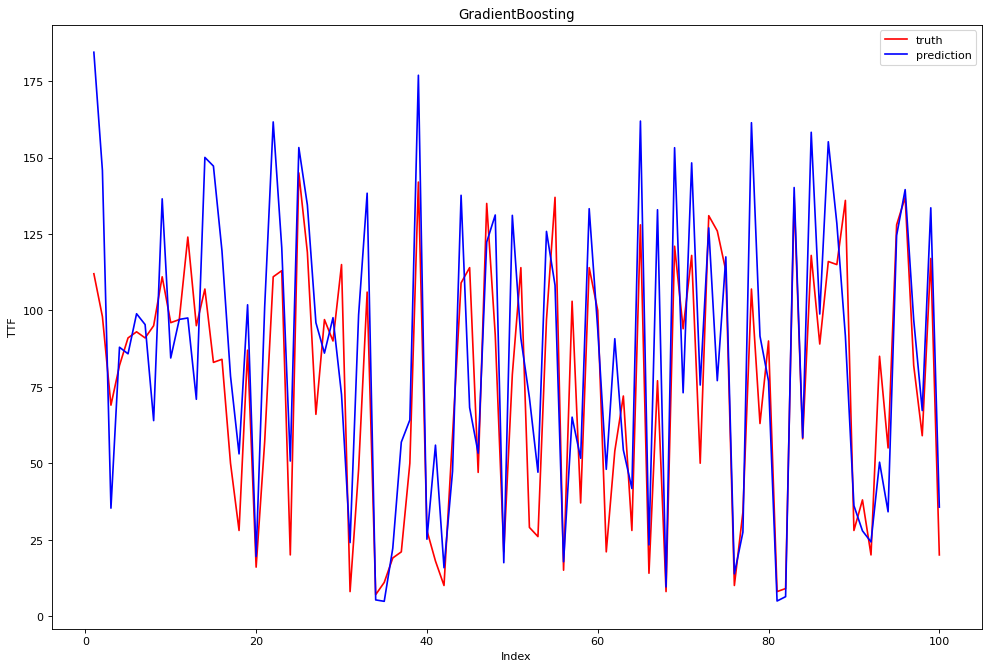

In [743]:
figure(figsize=(15, 10), dpi=80)
x = np.arange(1,101)
plt.title("GradientBoosting")
l1 = plt.plot(x, truth_y, c="r", label="truth")
l2 = plt.plot(x, y_pred, c="b", label="prediction")
plt.xlabel("Index")
plt.ylabel("TTF")
plt.legend()
plt.show()